# Exploratory Data Analysis

Ici nous pouvons faire toutes nos analyses des données

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Je reprends ta nomenclature sur les datasets cela nous permettra de pouvoir comparer les fonctions plus facilement comment on parlera de la même chose

In [2]:
training_data_1 = pd.read_csv("Data/Initial/train.csv")
testing_data_1 = pd.read_csv("Data/Initial/test.csv")

wp_1_forecast = pd.read_csv("Data/Initial/wp1.csv")
wp_2_forecast = pd.read_csv("Data/Initial/wp2.csv")
wp_3_forecast = pd.read_csv("Data/Initial/wp3.csv")
wp_4_forecast = pd.read_csv("Data/Initial/wp4.csv")
wp_5_forecast = pd.read_csv("Data/Initial/wp5.csv")
wp_6_forecast = pd.read_csv("Data/Initial/wp6.csv")

In [3]:
wp_1_forecast.head()

,date,hors,u,v,ws,wd
0,2009070100,1,3.14,-3.62,4.79,139.09
1,2009070100,2,2.96,-3.56,4.63,140.26
2,2009070100,3,2.89,-3.46,4.51,140.15
3,2009070100,4,2.87,-3.33,4.40,139.26
4,2009070100,5,2.80,-3.19,4.25,138.73


Je fais encore quelques test pour comprendre aussi git

### Functions
J'ai repris tes fonctions pour les dates :)

In [4]:
def integer2date(s):
    s = str(s)
    return  datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]), hour=int(s[8:]))

def adding_hours(h):
    return timedelta(hours = h)

def date_conversion(df):
    df['forecast_time'] = df.date.apply(lambda x: integer2date(x))
    df['hours_added'] = df.hors.apply(lambda x: adding_hours(x))
    df['date'] = df['forecast_time'] + df['hours_added']
    df = df.drop(['hours_added', 'hors'], axis = 1)
    return df

### Skewness of WPs

J'aime l'idée de regarder la skewness des données. Je regarde celle des WP, de mémoire Sun (la N°1) avait réduit la skewness du wp1

In [4]:
for i in training_data_1.columns:
    print(training_data_1[i].skew())    

0.5093657149642632
0.8451902425489617
1.0968414562815931
1.007556231044613
0.8609311042833497
0.7835154891885409
1.0301915370685903


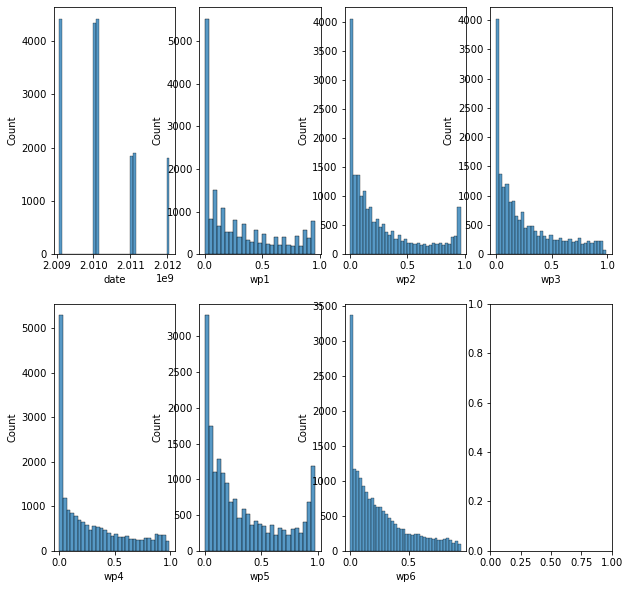

In [8]:
n_rows=2
n_cols=4

a4_dims = (10, 10)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=a4_dims)

for i, column in enumerate(training_data_1.columns):
    sns.histplot(training_data_1[column],ax=axes[i//n_cols,i%n_cols])

In [6]:
#for i in training_data_1.columns:
 #   training_data_1[str(i) + '_correted'] = np.sqrt(training_data_1[i])

In [7]:
#training_data_1.head()

### Exploration and comparison of the datasets
To explore if distribution and data structure vary by much between datasets

Je commences par les WPs

In [35]:
stats_wps = pd.DataFrame(index =[i for i in training_data_1.columns if i!= 'date'] ) 

In [36]:
stats_wps['mean'] = np.mean(training_data_1, axis=0)[1:]
stats_wps['std'] = np.std(training_data_1, axis=0)[1:]
stats_wps['variance'] = np.var(training_data_1,axis=0)[1:]
stats_wps['max'] = np.max(training_data_1,axis=0)[1:]
stats_wps['min'] = np.min(training_data_1,axis=0)[1:]

In [37]:
stats_wps.head(7)

,mean,std,variance,max,min
wp1,0.290547,0.305351,0.093239,0.960,0.0
wp2,0.272823,0.294390,0.086665,0.966,0.0
wp3,0.266294,0.273343,0.074717,0.989,0.0
wp4,0.286181,0.295224,0.087157,0.992,0.0
wp5,0.334295,0.318618,0.101517,0.978,0.0
wp6,0.252136,0.246276,0.060652,0.947,0.0


Quick and dirty sur les forecasts

In [90]:
stats_forecast = pd.DataFrame(index = [i for i in [i for i in wp_1_forecast.columns if i!='date'] if i!= 'hors'])
#stats_forecast.head()

In [91]:
datasets = [wp_1_forecast,wp_2_forecast,wp_3_forecast,wp_4_forecast,wp_5_forecast,wp_6_forecast]
#for i in range (1,7):
 #   datasets.append('wp_'+str(i)+'_forecast')

In [92]:
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_mean']=np.mean(j.iloc[:,2:],axis=0)
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_std']=np.std(j.iloc[:,2:],axis=0)
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_var']=np.var(j.iloc[:,2:],axis=0)
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_max']=np.max(j.iloc[:,2:],axis=0)
for i,j in enumerate(datasets):
    stats_forecast['wp_'+str(i+1)+'_min']=np.min(j.iloc[:,2:],axis=0)
    

In [94]:
stats_forecast.head()

,wp_1_mean,wp_2_mean,wp_3_mean,wp_4_mean,wp_5_mean,wp_6_mean,wp_1_std,wp_2_std,wp_3_std,wp_4_std,...,wp_3_max,wp_4_max,wp_5_max,wp_6_max,wp_1_min,wp_2_min,wp_3_min,wp_4_min,wp_5_min,wp_6_min
u,1.168435,1.318864,0.542813,1.220828,1.154190,1.597133,3.763357,3.182570,3.173943,3.287101,...,12.77,13.75,16.78,15.25,-12.52,-9.92,-11.44,-10.72,-14.60,-9.24
v,-0.113256,0.214509,-0.243599,-0.043790,0.030322,-0.089720,4.799884,3.440446,3.168400,3.615630,...,13.26,14.02,15.04,10.71,-15.36,-10.32,-11.56,-13.17,-13.75,-10.85
ws,5.577651,4.419870,4.064729,4.527633,4.637438,4.071236,2.732965,2.053202,1.986136,2.206976,...,14.91,15.75,16.78,15.81,0.05,0.02,0.01,0.03,0.02,0.01
wd,157.603322,143.115222,180.781666,152.799327,153.408561,144.820224,102.649059,99.534201,101.488463,100.063320,...,359.97,360.00,360.00,359.99,0.00,0.00,0.02,0.00,0.01,0.02


### Deviation between first and last hours of forecast

In [102]:
select_columns = wp_1_forecast[['ws','u']]
forecast_ws = select_columns.copy()
forecast_ws.head()

,ws,u
0,4.79,3.14
1,4.63,2.96
2,4.51,2.89
3,4.40,2.87
4,4.25,2.80


In [118]:
forecast_ws['rolling_36'] = forecast_ws['ws'].shift(-37)

In [119]:
forecast_ws.head(50)

,ws,u,rolling_36
0,4.79,3.14,1.80
1,4.63,2.96,2.79
2,4.51,2.89,3.33
3,4.40,2.87,3.47
4,4.25,2.80,3.37
5,4.00,2.57,3.16
6,3.66,2.14,2.96
7,3.32,1.67,2.82
8,3.06,1.43,2.78
9,2.91,1.56,2.77
